# K-Means Algorithm
### Unsupervised Learning, Clustering
## Clustering
* it’s the task of partitioning the dataset into groups, called clusters
* the goal is to split up the data ins such a way that points within a single cluster are very similar and points in a different cluster are different

## k-means clustering
* tries to find cluster centers that are representative of certain regions of the data
* alternates between two steps: assigning each data point to the closest cluster center, and then setting each cluster center as the mean of the data points that are assigned to it
* the algorithm is finished when the assignment of instances to clusters no longer changes

## How It's Look Like?

In [1]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


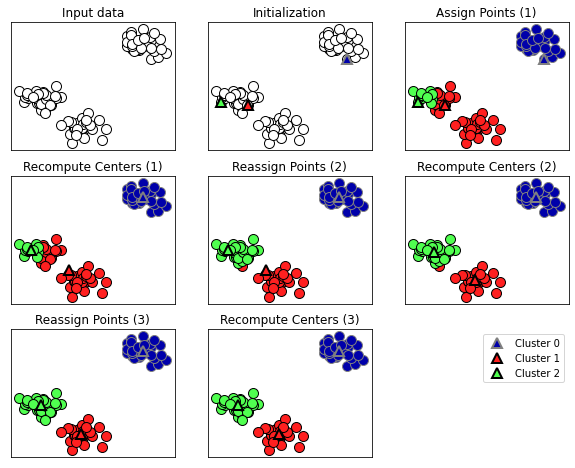

In [2]:
import mglearn
mglearn.plots.plot_kmeans_algorithm()

### Implementation from scratch

In [12]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist  #function to calculate distances
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
# Generate Data
df = pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=list('ABCD'))  

# numbers: [0, 100], size: 100 rows; 4 columns
# randint(low[, high, size, dtype])	Return random integers from low (inclusive) to high (exclusive).

In [5]:
def kmeans (X, num_clusters, num_iterations):
    
    k_centroids_position_list = np.random.choice(len(X), num_clusters, replace=False)   
    centroids = df.loc[k_centroids_position_list, :]
    distances = cdist(df, centroids ,'chebyshev') 
    assignments = np.array([np.argmin(i) for i in distances])
    
    for _ in range(num_iterations): 
        centroids = [] 
        for k_centroids_position_list in range(num_clusters):
            temp_centroids = X[assignments==k_centroids_position_list].mean(axis=0)
            centroids.append(temp_centroids) 
            
        centroids = np.vstack(centroids) 
        distances = cdist(X, centroids ,'euclidean') 
        assignments = np.array([np.argmin(i) for i in distances]) 
        
        
    return centroids, assignments

## Code with notes

In [ ]:
def kmeans (X, num_clusters, num_iterations): # X - DataFrame
    
    k_centroids_position_list = np.random.choice(len(X), k, replace=False)   #Randomly choosing Centroids 
    # replace=False - point can be chosen more than once, K - num of selection, len(X) - choose K position according number of rows [0, 99]
  
    centroids = df.loc[k_centroids_list, :]
    distances = cdist(df, centroids ,'chebyshev')  # The distance of each data from each centroids; num_of_rows * K Array
    """The distance metric to use. If a string, the distance function can be ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, 
    ‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, ‘kulsinski’, ‘mahalanobis’, ‘matching’,
    ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, 
    ‘wminkowski’, ‘yule’."""
    
    assignments = np.array([np.argmin(i) for i in distances]) # array with classification to each data based on shorthest distance
    
    for _ in range(num_iterations): 
        centroids = [] # new initialization for list of centroids
        
        for k_centroids_position_list in range(num_clusters):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_centroids = X[assignments==k_centroids_position_list].mean(axis=0) 
            # calculate mean for each claster [0, K], including all points which belongs to specific claster; If condition is TRUE- Take in consider all points which belong to the i-th claster
            
            centroids.append(temp_centroids) #append the i new centroid
            
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(X, centroids ,'euclidean') # recalculat the distances between new centroids to all data
        assignments = np.array([np.argmin(i) for i in distances]) # new assignment to all data based on new centroids
        
        
    return centroids, assignments

## Implementation

In [10]:
df = pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=list('ABCD'))
num_clusters = 3
num_iterations = 15
centroids, assignments = kmeans(df, num_clusters, num_iterations)
print("The centroids are: \n", centroids)
print("The classification: \n", assignments)

The centroids are: 
 [[46.8372093  21.         53.1627907  52.55813953]
 [78.51851852 57.14814815 38.74074074 30.14814815]
 [38.5        71.06666667 51.73333333 73.13333333]]
The classification: 
 [0 0 2 1 0 1 2 2 0 0 0 1 0 1 2 0 1 0 2 1 1 0 2 0 2 2 0 1 1 2 2 0 2 0 0 2 2
 1 1 1 2 1 1 0 2 0 0 0 1 1 0 0 1 1 1 0 2 2 1 2 2 1 0 2 1 0 0 0 0 1 2 0 0 1
 0 0 0 0 2 0 0 2 2 1 0 0 2 0 0 2 0 1 0 0 2 0 2 1 2 2]


In [7]:
print(df)

     A   B   C   D
0   84  84  76  15
1   77  61  56  90
2    5  80   6  36
3   10  69  21  51
4   76  76  81  76
..  ..  ..  ..  ..
95  12  86   9  53
96  72  75  94  73
97  29  22   0  71
98  67  22  78  92
99  12   4  82  27

[100 rows x 4 columns]


# K-Means & clustering problem

## There ara data that the k-means algorithm will not cluster according to human intution of the clustering.
## Let's take an example:


k-means clustering assumes that all directions are equally important for each cluster. This is usually not a big problem, unless we come across with some oddly shape data.
In this example, we will artificially generate that type of data. With the code below, we can generate some data that k-means won’t be able to handle correctly:

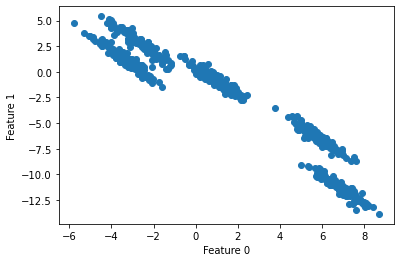

In [13]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

we have arguably 5 defined clusters with a stretched diagonal shape.

Text(0, 0.5, 'Feature 1')

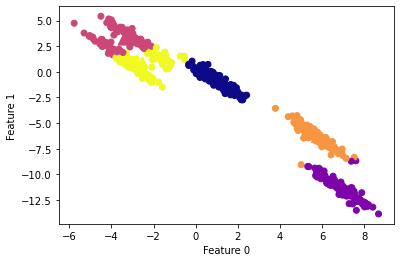

In [14]:
# cluster the data into five clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0, 1, 2, 3, 4], 
            s=100, 
            linewidth=2,
            cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

k-means has been able to correctly detect the clusters at the middle and bottom, while presenting trouble with the clusters at the top, which are very close to each other. 
These groups are stretched toward the diagonal. As k-means only considers the distance to the nearest cluster center, it can’t handle this kind of data.

### Note: 
Solution for this clustering problem is DBSCAN Algorithm which stands for density based spatial clustering of applications with noise.